<a href="https://colab.research.google.com/github/bimapamungkas666/UTS/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
!pip install google-search-results

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [45]:
from serpapi import GoogleSearch
from urllib.parse import *

In [46]:
from serpapi import GoogleSearch

params = {
  "api_key": "441e5eafa042f65a0303af1ddebbbc5fdce468d24492564c9501805fbf928b9a",
  "device": "desktop",
  "engine": "google_maps",
  "type": "search",
  "google_domain": "google.com",
  "q": "wisata semarang",
  "hl": "en",
  "ll": "@40.7455096,-74.0083012,14z"
}

search = GoogleSearch(params)
results = search.get_dict()
search = GoogleSearch(params)

mPosition = 0 # Angka indeks dari data
mNums = 5 # Batas jumlah data yang ditampilkan
local_results = []

while mPosition <= mNums:
  results = search.get_dict()

  for result in results["local_results"]:
    mPosition += 1
    
    if mPosition <= mNums:
      
      # Jika jumlah review kurang dari 150, maka jangan masukkan datanya
      if result["reviews"] < 150:
        mNums += 1
        continue
        
      # Append data sesuai dengan batas jumlah yang sudah ditentukan
      local_results.append({'title': result["title"],
                           'data_id': result["data_id"],
                           'reviews_total': result["reviews"]});

  if "next" in results.get("serpapi_pagination", {}):
    # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
    search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

  else:
    break

https://serpapi.com/search
https://serpapi.com/search


In [47]:
for lr in local_results:
  print(lr)

{'title': 'Lawang Sewu', 'data_id': '0x2e708b4f19af0393:0x11304de4230ded0d', 'reviews_total': 62924}
{'title': 'Kota Lama Semarang', 'data_id': '0x2e70f4a9c5b90845:0xcdad87f56d2be6e', 'reviews_total': 20111}
{'title': 'Kampung Pelangi', 'data_id': '0x2e708c54eb15a0a5:0x21051fe4e22e41db', 'reviews_total': 3858}
{'title': 'Semarang Chinatown', 'data_id': '0x2e70f4aab14d29ab:0xbe7ff6928f077887', 'reviews_total': 3445}
{'title': 'Grand Maerakaca', 'data_id': '0x2e70f4d1d1aea6e7:0xf936da89553247a2', 'reviews_total': 4316}


In [48]:
data = {'wisata_name':[],
        'name':[],
        'rating':[],
        'review':[]}

for lr in local_results:
  
  params = {
    "engine": "google_maps_reviews",
    "data_id": "",
    "api_key": "441e5eafa042f65a0303af1ddebbbc5fdce468d24492564c9501805fbf928b9a"
  }
  
  params["data_id"] = lr['data_id']

  search = GoogleSearch(params)

  mPosition = 0 # Angka indeks dari data
  mNums = 35 # Batas jumlah data yang ditampilkan

  while mPosition <= mNums:
    results = search.get_dict()

    for result in results["reviews"]:
      mPosition += 1

      if mPosition <= mNums:
        # Append data sesuai dengan batas jumlah yang sudah ditentukan
        data['wisata_name'].append(lr['title']);
        data['name'].append(result["user"]["name"]);
        data['rating'].append(result["rating"]);
        data['review'].append(result["snippet"]);

    if "next" in results.get("serpapi_pagination", {}):
      # Akan mengubah parameter dari 'GoogleSearch()' dengan isi parameter dari halaman selanjutnya
      search.params_dict.update(dict(parse_qsl(urlsplit(results.get("serpapi_pagination").get("next")).query)))

    else:
      break
    
review_original = data['review']

https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search
https://serpapi.com/search


In [49]:
import pandas as pd
df_original = pd.DataFrame(data)
df_original.to_csv('hasil.csv', index=False)

In [50]:
df_original

,wisata_name,name,rating,review
0,Lawang Sewu,Adhilla Salsabila,5.0,Perfect place to stroll around and enjoy the v...
1,Lawang Sewu,Ethan Josiah Effendi,5.0,"Not spooky at all. In fact, it was quite the o..."
2,Lawang Sewu,Redzky Yoga,5.0,This is an extraordinary place! You must do a ...
3,Lawang Sewu,Roy Tan,3.0,Looks beautiful from the outside. Nothing much...
4,Lawang Sewu,Yasmina Wulandari,5.0,Beautiful building filled with history. Good p...
...,...,...,...,...
170,Grand Maerakaca,syafa,4.0,It's similar like mangrove in surabayaGood pla...
171,Grand Maerakaca,Anita Dwinata Lubis,4.0,"This is miniature of Middle Java, like Taman M..."
172,Grand Maerakaca,Joy Yarson7 Baneftar,3.0,"Not very well organized. I mean come on, you c..."
173,Grand Maerakaca,Atika Putri,5.0,Great place for culture education.


In [51]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [52]:
review_remove_translated = []

for review in review_original:
  review_sep = review.split("(Translated by Google) ")
  
  # Jika terdapat (Translated by Google)
  if review_sep[0] == "":
    review_sep = ("".join(review_sep)).split("(Original)")
    review_sep = review_sep[0]
    review = "".join(review_sep)
    
  review_remove_translated.append(review)

In [53]:
filename = "https://raw.githubusercontent.com/bimapamungkas666/UTS/main/hasil.csv"
df = pd.read_csv('hasil.csv')
df.head()

,wisata_name,name,rating,review
0,Lawang Sewu,Adhilla Salsabila,5.0,Perfect place to stroll around and enjoy the v...
1,Lawang Sewu,Ethan Josiah Effendi,5.0,"Not spooky at all. In fact, it was quite the o..."
2,Lawang Sewu,Redzky Yoga,5.0,This is an extraordinary place! You must do a ...
3,Lawang Sewu,Roy Tan,3.0,Looks beautiful from the outside. Nothing much...
4,Lawang Sewu,Yasmina Wulandari,5.0,Beautiful building filled with history. Good p...


In [54]:
df_original

,wisata_name,name,rating,review
0,Lawang Sewu,Adhilla Salsabila,5.0,Perfect place to stroll around and enjoy the v...
1,Lawang Sewu,Ethan Josiah Effendi,5.0,"Not spooky at all. In fact, it was quite the o..."
2,Lawang Sewu,Redzky Yoga,5.0,This is an extraordinary place! You must do a ...
3,Lawang Sewu,Roy Tan,3.0,Looks beautiful from the outside. Nothing much...
4,Lawang Sewu,Yasmina Wulandari,5.0,Beautiful building filled with history. Good p...
...,...,...,...,...
170,Grand Maerakaca,syafa,4.0,It's similar like mangrove in surabayaGood pla...
171,Grand Maerakaca,Anita Dwinata Lubis,4.0,"This is miniature of Middle Java, like Taman M..."
172,Grand Maerakaca,Joy Yarson7 Baneftar,3.0,"Not very well organized. I mean come on, you c..."
173,Grand Maerakaca,Atika Putri,5.0,Great place for culture education.


In [55]:
df.drop(columns = ['wisata_name', 'name'], inplace = True)

In [56]:
df.head()

,rating,review
0,5.0,Perfect place to stroll around and enjoy the v...
1,5.0,"Not spooky at all. In fact, it was quite the o..."
2,5.0,This is an extraordinary place! You must do a ...
3,3.0,Looks beautiful from the outside. Nothing much...
4,5.0,Beautiful building filled with history. Good p...


In [57]:
import string
import re

In [58]:
def clean_review(review):
    return re.sub('[^a-zA-Z]', ' ', review).lower()
  
df['cleaned_review'] = df['review'].apply(lambda x: clean_review(str(x)))
df['label'] = df['rating'].map({1.0:0, 2.0:0, 3.0:0, 4.0:1, 5.0:1})

In [59]:
def count_punct(review):
    count = sum([1 for char in review if char in string.punctuation])
    return round(count/(len(review) - review.count(" ")), 3)*100
  
df['review_len'] = df['review'].apply(lambda x: len(str(x)) - str(x).count(" "))
df['punct'] = df['review'].apply(lambda x: count_punct(str(x)))
df

,rating,review,cleaned_review,label,review_len,punct
0,5.0,Perfect place to stroll around and enjoy the v...,perfect place to stroll around and enjoy the v...,1,394,1.8
1,5.0,"Not spooky at all. In fact, it was quite the o...",not spooky at all in fact it was quite the o...,1,325,3.4
2,5.0,This is an extraordinary place! You must do a ...,this is an extraordinary place you must do a ...,1,195,3.1
3,3.0,Looks beautiful from the outside. Nothing much...,looks beautiful from the outside nothing much...,0,168,2.4
4,5.0,Beautiful building filled with history. Good p...,beautiful building filled with history good p...,1,159,0.6
...,...,...,...,...,...,...
170,4.0,It's similar like mangrove in surabayaGood pla...,it s similar like mangrove in surabayagood pla...,1,51,2.0
171,4.0,"This is miniature of Middle Java, like Taman M...",this is miniature of middle java like taman m...,1,248,2.8
172,3.0,"Not very well organized. I mean come on, you c...",not very well organized i mean come on you c...,0,211,6.2
173,5.0,Great place for culture education.,great place for culture education,1,30,3.3


In [60]:
def tokenize_review(review):
    tokenized_review = review.split()
    return tokenized_review
  
df['tokens'] = df['cleaned_review'].apply(lambda x: tokenize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens
0,5.0,Perfect place to stroll around and enjoy the v...,perfect place to stroll around and enjoy the v...,1,394,1.8,"[perfect, place, to, stroll, around, and, enjo..."
1,5.0,"Not spooky at all. In fact, it was quite the o...",not spooky at all in fact it was quite the o...,1,325,3.4,"[not, spooky, at, all, in, fact, it, was, quit..."
2,5.0,This is an extraordinary place! You must do a ...,this is an extraordinary place you must do a ...,1,195,3.1,"[this, is, an, extraordinary, place, you, must..."
3,3.0,Looks beautiful from the outside. Nothing much...,looks beautiful from the outside nothing much...,0,168,2.4,"[looks, beautiful, from, the, outside, nothing..."
4,5.0,Beautiful building filled with history. Good p...,beautiful building filled with history good p...,1,159,0.6,"[beautiful, building, filled, with, history, g..."


In [61]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [62]:
def lemmatize_review(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_review(x))
df.head()

,rating,review,cleaned_review,label,review_len,punct,tokens,lemmatized_review
0,5.0,Perfect place to stroll around and enjoy the v...,perfect place to stroll around and enjoy the v...,1,394,1.8,"[perfect, place, to, stroll, around, and, enjo...",perfect place stroll around enjoy vintage cult...
1,5.0,"Not spooky at all. In fact, it was quite the o...",not spooky at all in fact it was quite the o...,1,325,3.4,"[not, spooky, at, all, in, fact, it, was, quit...",not spooky fact quite opposite basically histo...
2,5.0,This is an extraordinary place! You must do a ...,this is an extraordinary place you must do a ...,1,195,3.1,"[this, is, an, extraordinary, place, you, must...",extraordinary place must trip historical place...
3,3.0,Looks beautiful from the outside. Nothing much...,looks beautiful from the outside nothing much...,0,168,2.4,"[looks, beautiful, from, the, outside, nothing...",look beautiful outside nothing much see inside...
4,5.0,Beautiful building filled with history. Good p...,beautiful building filled with history good p...,1,159,0.6,"[beautiful, building, filled, with, history, g...",beautiful building filled history good place l...


In [63]:
#  Shape of the dataset, and breakdown of the classes
print(f"Input data has { len(df) } rows and { len(df.columns) } columns")
print(f"rating 1.0 = { len(df[df['rating']==1.0]) } rows")
print(f"rating 2.0 = { len(df[df['rating']==2.0]) } rows")
print(f"rating 3.0 = { len(df[df['rating']==3.0]) } rows")
print(f"rating 4.0 = { len(df[df['rating']==4.0]) } rows")
print(f"rating 5.0 = { len(df[df['rating']==5.0]) } rows")

Input data has 175 rows and 8 columns
rating 1.0 = 0 rows
rating 2.0 = 2 rows
rating 3.0 = 19 rows
rating 4.0 = 57 rows
rating 5.0 = 97 rows


Number of null in label: 0
Number of null in text: 0


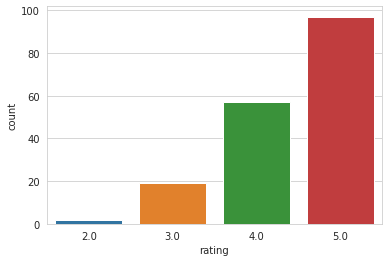

In [64]:
# Missing values in the dataset
print("Number of null in label: {}".format(df['rating'].isnull().sum()))
print("Number of null in text: {}".format(df['review'].isnull().sum()))
sns.countplot(x='rating', data=df);

In [65]:
from wordcloud import WordCloud

In [66]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0) ]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0) ]

#convert to list
negative_list= df_negative['lemmatized_review'].tolist()
positive_list=df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of negative
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of positive
filtered_positive = filtered_positive.lower()

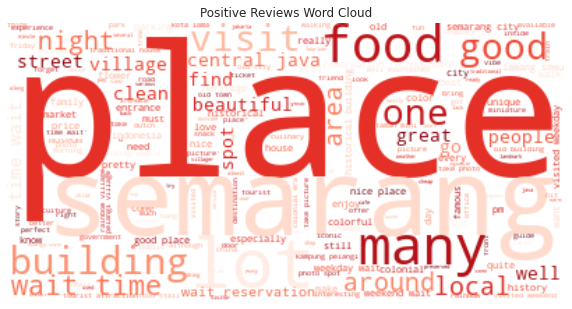

In [67]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews Word Cloud")
plt.show()

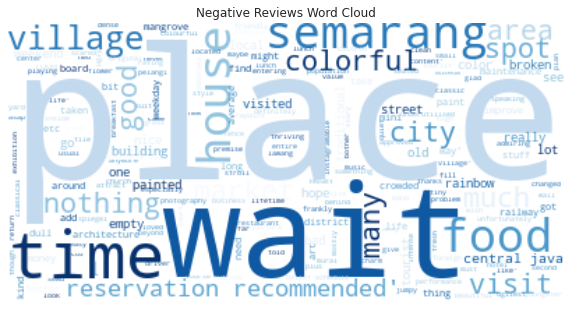

In [68]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Blues").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

In [69]:
X = df[['lemmatized_review', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(175, 3)
(175,)


In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(122, 3)
(53, 3)
(122,)
(53,)


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df = 0.5, min_df = 2) # ignore terms that occur in more than 50% documents and the ones that occur in less than 2
tfidf_train = tfidf.fit_transform(X_train['lemmatized_review'])
tfidf_test = tfidf.transform(X_test['lemmatized_review'])

X_train_vect = pd.concat([X_train[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['review_len', 'punct']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,review_len,punct,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403
0,172,3.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.196248,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.161065,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.164826,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.224653,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.224653,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145564,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.81629,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.18947,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.196248,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.213327,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,499,3.2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.276011,0.0,0.000000,0.0,0.102256,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.196877,0.161799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.106553,0.151924,0.0,0.0,0.0,0.0,0.0,0.0,0.090419,0.0,0.0,0.0,0.0,0.124087,0.0,0.0,0.0,0.0,0.0,0.161799,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [72]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      1.00      0.94        47

    accuracy                           0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53



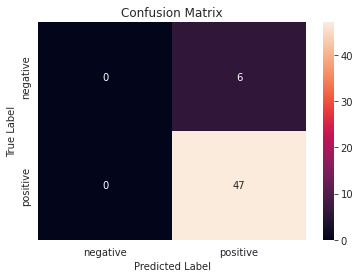

In [73]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train_vect, y_train)
naive_bayes_pred = classifier.predict(X_test_vect)

# Classification Report
print(classification_report(y_test, naive_bayes_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      1.00      0.94        47

    accuracy                           0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53



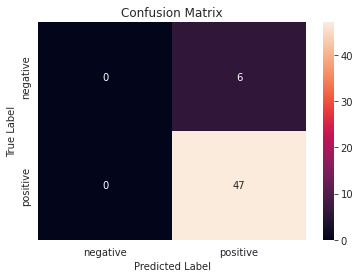

In [74]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=150)
classifier.fit(X_train_vect, y_train)
random_forest_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, random_forest_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, random_forest_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      1.00      0.94        47

    accuracy                           0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53



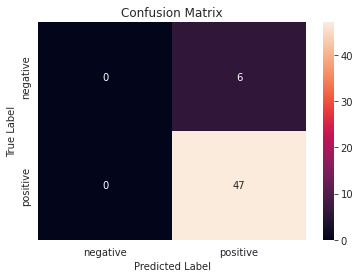

In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_vect, y_train)
log_reg_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, log_reg_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, log_reg_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      1.00      0.94        47

    accuracy                           0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53



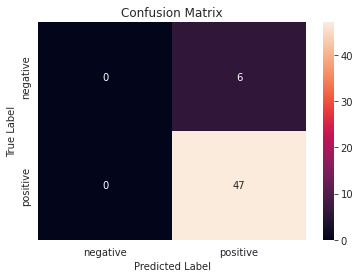

In [77]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_vect, y_train)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.89      1.00      0.94        47

    accuracy                           0.89        53
   macro avg       0.44      0.50      0.47        53
weighted avg       0.79      0.89      0.83        53



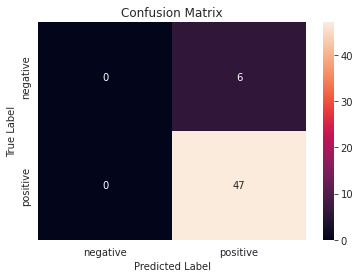

In [78]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train_vect, y_train)
knn_pred = classifier.predict(X_test_vect)

# Classification report
print(classification_report(y_test, knn_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, knn_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
from sklearn.model_selection import cross_val_score

models = [MultinomialNB(), LogisticRegression(), RandomForestClassifier(n_estimators = 150),
          SVC(kernel = 'linear'), KNeighborsClassifier(n_neighbors = 5)]
names = ["Naive Bayes", "Logistic Regression", "Random Forest", "SVM", "KNN"]
for model, name in zip(models, names):
    print(name)
    for score in ["accuracy", "precision", "recall", "f1"]:
        print(f" {score} - {cross_val_score(model, X_train_vect, y_train, scoring=score, cv=10).mean()} ")
    print()

Naive Bayes
 accuracy - 0.8692307692307691 
 precision - 0.8768065268065268 
 recall - 0.990909090909091 
 f1 - 0.9295783926218707 

Logistic Regression
 accuracy - 0.8692307692307691 
 precision - 0.876048951048951 
 recall - 0.99 
 f1 - 0.9291266704310182 

Random Forest
 accuracy - 0.8775641025641026 
 precision - 0.8775641025641026 
 recall - 1.0 
 f1 - 0.9343214756258232 

SVM
 accuracy - 0.8775641025641026 
 precision - 0.8775641025641026 
 recall - 1.0 
 f1 - 0.9343214756258232 

KNN
 accuracy - 0.8775641025641026 
 precision - 0.8775641025641026 
 recall - 1.0 
 f1 - 0.9343214756258232 



In [80]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)

classifier.fit(tfidf_train, y_train)
classifier.score(tfidf_test, y_test)

0.8867924528301887

In [82]:
data = ["Bad", "Good", "I hate the service, it's really bad", "The nurse is so kind"]
vect = tfidf.transform(data).toarray()

my_pred = classifier.predict(vect)
print(my_pred)

[1 1 1 1]


In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_cv = cv.fit_transform(df['lemmatized_review']) # Fit the Data
y_cv = df['label']

from sklearn.model_selection import train_test_split
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.3, random_state=42)

In [84]:
#Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

clf.fit(X_train_cv, y_train_cv)
clf.score(X_test_cv, y_test_cv)

0.8301886792452831